##PHASE 1. EDA & DATA VALIDATION


###Load Data

In [30]:
import kagglehub
datasource = kagglehub.dataset_download('nehalbirla/vehicle-dataset-from-cardekho')

print('Set up Kaggle source: Successfully')

Set up Kaggle source: Successfully


In [31]:
#Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rmdf = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv')

#Check general info
rmdf.info()
rmdf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1175,Hyundai,Verna 1.6 CRDI SX,1125000,2019,40000,Diesel,Manual,Ludhiana,White,First,Individual,1582 cc,126 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0
28,Hyundai,Elite i20 Asta 1.2,551000,2015,47752,Petrol,Manual,Mumbai,White,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0
478,Audi,A6 2.0 TDI Premium,1175000,2012,77000,Diesel,Automatic,Mumbai,Blue,Second,Individual,1968 cc,177 bhp @ 3750 rpm,380 Nm @ 1750 rpm,FWD,4915.0,1874.0,1455.0,5.0,65.0
832,Maruti Suzuki,Ertiga VDi,459999,2013,77000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,4265.0,1695.0,1685.0,7.0,45.0
211,Maruti Suzuki,Swift DZire ZDI,550000,2014,89000,Diesel,Manual,Chennai,White,First,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
1955,Hyundai,Elite i20 Sportz 1.2 (O),660000,2018,9000,Petrol,Manual,Mumbai,Grey,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0
24,Maruti Suzuki,Alto LXi CNG,370000,2019,47377,CNG,Manual,Delhi,Grey,First,Individual,998 cc,58 bhp @ 6000 rpm,78 Nm @ 3500 rpm,FWD,3545.0,1490.0,1475.0,4.0,60.0
504,Ford,Endeavour Titanium 3.2 4x4 AT,3450000,2019,41526,Diesel,Automatic,Coimbatore,Silver,First,Individual,3198 cc,197 bhp @ 3000 rpm,470 Nm @ 1750 rpm,AWD,4892.0,1860.0,1837.0,7.0,80.0
773,Audi,Q3 2.0 TDI quattro Premium,1850000,2013,44087,Diesel,Automatic,Mumbai,White,First,Individual,1968 cc,174 bhp @ 4200 rpm,380 Nm @ 1750 rpm,AWD,4385.0,1831.0,1608.0,5.0,64.0
1726,Maruti Suzuki,Celerio ZXi AMT [2019-2020],630000,2019,20734,Petrol,Automatic,Udupi,Silver,First,Individual,998 cc,67 bhp @ 6000 rpm,90 Nm @ 3500 rpm,FWD,3695.0,1600.0,1560.0,5.0,35.0


###Schema

In [32]:
# Schema Validation
assert rmdf['Price'].dtype == 'int64'
assert rmdf['Kilometer'].dtype == 'int64'
assert rmdf['Year'].dtype == 'int64'

In [33]:
# Format Validation for Price, Kilometer
assert (rmdf['Price'] >= 0).all()
assert (rmdf['Kilometer'] >= 0).all()

In [34]:
# Range Validation
assert rmdf['Year'].between(1980, 2025).all()

###Original Numeric Features

In [35]:
# Describe mumeric data
print("Numeric Data Pre-transform:")
rmdf.describe(include=['int','float']).T

Numeric Data Pre-transform:


,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.00,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.00,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.00,50000.0,72000.0,2000000.0
Length,1995.0,4.280861e+03,4.424585e+02,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1.767992e+03,1.352658e+02,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1.591735e+03,1.360740e+02,1165.0,1485.00,1545.0,1675.0,1995.0
Seating Capacity,1995.0,5.306266e+00,8.221701e-01,2.0,5.00,5.0,5.0,8.0
Fuel Tank Capacity,1946.0,5.200221e+01,1.511020e+01,15.0,41.25,50.0,60.0,105.0


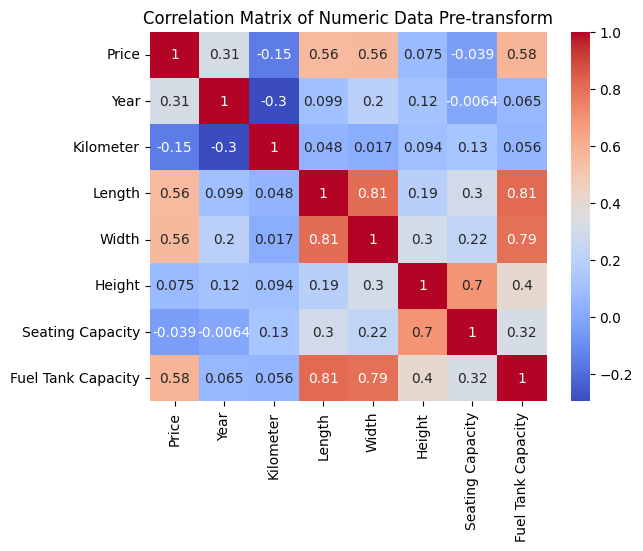

In [36]:
# Correlation among numeric variables
corr = rmdf.select_dtypes(include=['number']).corr()  #Không thể gộp object và int vào 1 correlation matrix, phải trải qua data transform, mới tính lại matrix này ở Section 3
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Data Pre-transform")
plt.show()

Insight:
- Price and Max Power/Max Torque/Engine: There are strong positive correlations between Price and Max Power, Max Torque, and Engine. This is expected, as cars with more powerful engines and higher torque generally tend to be more expensive.
- Price and Length/Width/Fuel Tank Capacity: There are also positive correlations between Price and Length, Width, and Fuel Tank Capacity. Larger cars with bigger fuel tanks might be associated with higher price points, possibly indicating larger or more luxurious vehicle segments.
- Age and Price/Length/Width: Age shows a negative correlation with Price, Length, and Width. This makes sense, as older cars are typically less expensive and car dimensions have changed over time.
- Seating Capacity: Seating Capacity does not appear to have a strong correlation with Price or most other numerical features in this initial view.

###Original Categorical Features

In [37]:
# Describe categorical data
print("Categortical Data Pre-transform:")
rmdf.describe(include='object').T

Categortical Data Pre-transform:


,count,unique,top,freq
Make,2059,33,Maruti Suzuki,440
Model,2059,1050,X1 sDrive20d xLine,15
Fuel Type,2059,9,Diesel,1049
Transmission,2059,2,Manual,1133
Location,2059,77,Mumbai,342
Color,2059,17,White,802
Owner,2059,6,First,1619
Seller Type,2059,3,Individual,1997
Engine,1979,108,1197 cc,231
Max Power,1979,335,89 bhp @ 4000 rpm,90


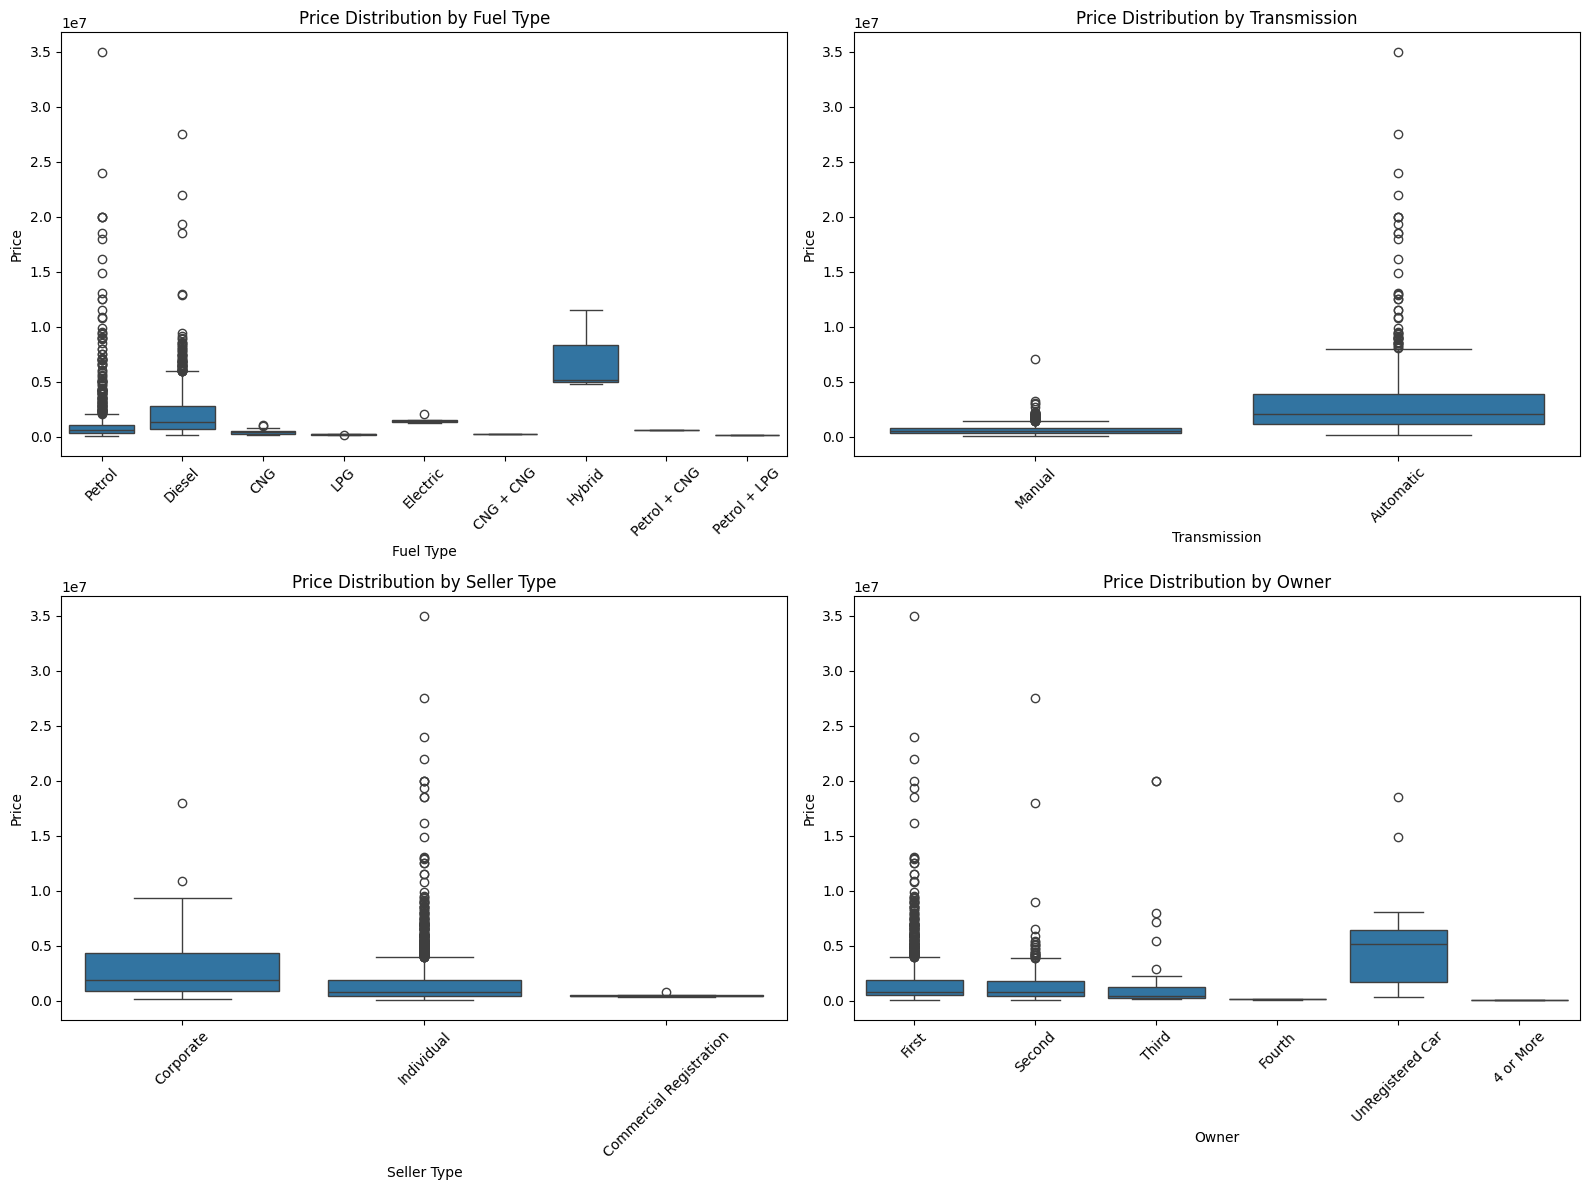

In [38]:
# Check correlation between Fuel type, Transmission, Seller Type, Owner and Price
categorical_vars = ['Fuel Type', 'Transmission', 'Seller Type', 'Owner']
plt.figure(figsize=(16, 12))

for i, cat_var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cat_var, y='Price', data=rmdf)
    plt.title(f'Price Distribution by {cat_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Insight:
- Fuel Type: The box plot for Fuel Type shows that Diesel and Petrol cars tend to have higher median prices and a wider range of prices compared to other fuel types like CNG or LPG. Electric cars also show a significant range of prices.
- Transmission: Cars with Automatic transmission generally have higher median prices and a larger spread of prices compared to Manual transmission cars. This suggests that automatic cars are often in higher price segments.
- Seller Type: The Individual seller type has a much wider distribution of prices, including many outliers at higher prices, compared to Dealer and Trustmark Dealer. This is expected as individual sellers might have a more varied range of cars and pricing strategies.
- Owner: The box plot for Owner shows that cars with First owners tend to have the highest median price and the widest price range. As the number of owners increases (Second, Third, Fourth & Above), the median price generally decreases, which is intuitive as cars depreciate with more owners.

###Missing Values

Missing Values Information:
                    Missing Count  Missing Percentage
Engine                         80            3.885381
Max Power                      80            3.885381
Max Torque                     80            3.885381
Drivetrain                    136            6.605148
Length                         64            3.108305
Width                          64            3.108305
Height                         64            3.108305
Seating Capacity               64            3.108305
Fuel Tank Capacity            113            5.488101


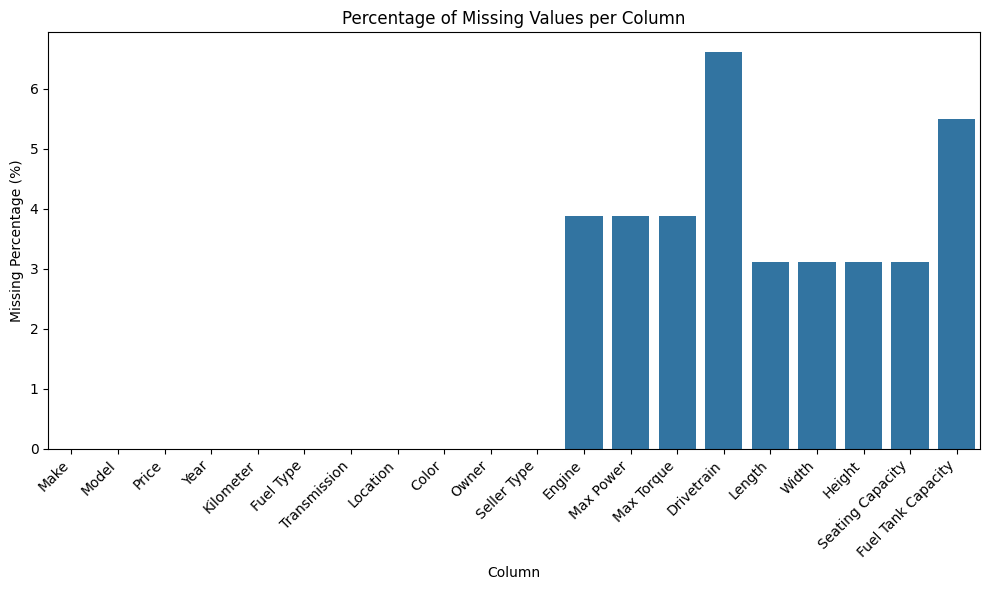

In [39]:
# Missing Value Validation Pre-transform
missing_values = rmdf.isnull().sum()
missing_percentage = (missing_values / len(rmdf)) * 100

missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print("Missing Values Information:")
print(missing_info[missing_info['Missing Count'] > 0])

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_info.index, y=missing_info['Missing Percentage'])
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

##PHASE 2. DATA PREPARATION & FEATURE ENGINEERING

###Clean Missing Values

In [40]:
# Drop missing values/outliers
rmdf.dropna(inplace=True , ignore_index=True)
rmdf.info()
rmdf.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
800,Maruti Suzuki,Eeco 5 STR WITH A/C+HTR [2019-2020],328000,2018,26807,Petrol,Manual,Mumbai,Black,Second,Individual,1196 cc,73 bhp @ 6000 rpm,101 Nm @ 3000 rpm,RWD,3675.0,1475.0,1800.0,5.0,40.0
198,Audi,RS5 4.2 Coupe,3650000,2012,25500,Petrol,Automatic,Mumbai,Blue,Second,Corporate,4163 cc,444 bhp @ 8250 rpm,430 Nm @ 4000 rpm,AWD,4649.0,1860.0,1366.0,5.0,64.0
268,Volkswagen,Polo Comfortline 1.2L (P),375000,2013,39000,Petrol,Manual,Delhi,Red,First,Individual,1198 cc,74 bhp @ 5400 rpm,110 Nm @ 3750 rpm,FWD,3970.0,1682.0,1453.0,5.0,45.0
1603,Hyundai,Verna 1.6 VTVT SX AT,770000,2016,20000,Petrol,Automatic,Pune,White,First,Individual,1591 cc,121 bhp @ 6300 rpm,158 Nm @ 4200 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0
1593,Audi,A4 Premium Plus 40 TFSI,4151000,2022,1,Petrol,Automatic,Delhi,Black,UnRegistered Car,Individual,1984 cc,188 bhp @ 4200 rpm,320 Nm @ 1450 rpm,FWD,4762.0,1847.0,1433.0,5.0,54.0


In [41]:
# Missing Value Validation Post-transform
na_pct = rmdf.isna().mean() * 100
print("Missing Percentages Post-transform:")
display(na_pct.to_frame(name='Missing %'))

Missing Percentages Post-transform:


,Missing %
Make,0.0
Model,0.0
Price,0.0
Year,0.0
Kilometer,0.0
Fuel Type,0.0
Transmission,0.0
Location,0.0
Color,0.0
Owner,0.0


###Transform feature 'Year' to 'Age'

In [42]:
# Create feature Age by replacing Year
rmdf['Year'] = 2025 - rmdf['Year']
rmdf.rename(columns={'Year':'Age'},inplace=True)
rmdf.info()
rmdf.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Age                 1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

,Make,Model,Price,Age,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1174,Toyota,Fortuner 3.0 4x2 MT,1375000,13,98352,Diesel,Manual,Patna,White,First,Individual,2982 cc,169 bhp @ 3600 rpm,343 Nm @ 1400 rpm,RWD,4705.0,1840.0,1850.0,7.0,80.0
1210,Maruti Suzuki,XL6 Zeta MT Petrol,1225000,3,16000,Petrol,Manual,Delhi,Grey,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,4445.0,1775.0,1700.0,6.0,45.0
1523,Maruti Suzuki,Ciaz VDi+ SHVS,591000,10,65000,Diesel,Manual,Ahmedabad,White,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0


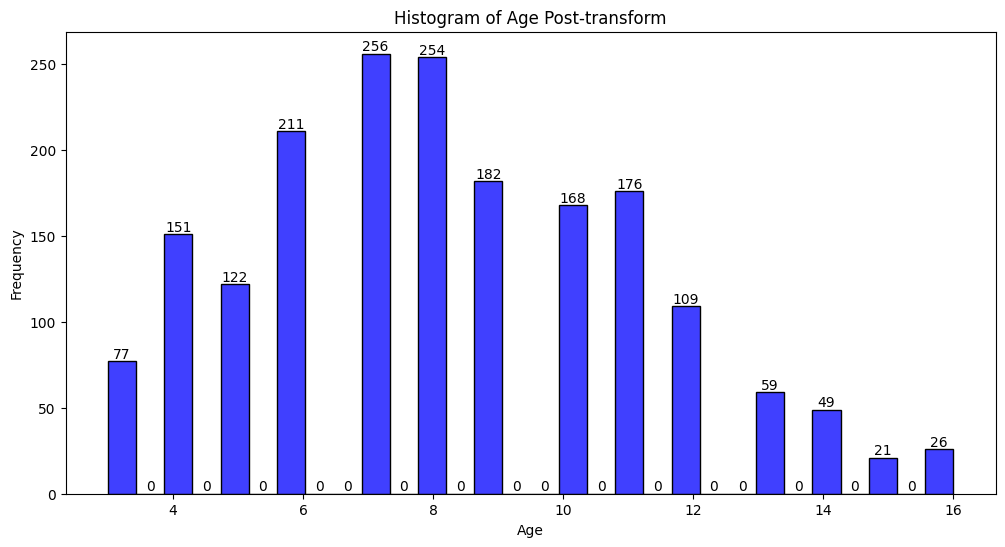

In [43]:
# Drop production years with less than 10 records
age_counts = rmdf['Age'].value_counts()
age_to_drop = age_counts[age_counts < 10].index
rmdf = rmdf[~rmdf['Age'].isin(age_to_drop)].copy()

plt.figure(figsize=(12, 6))
ax = sns.histplot(rmdf['Age'], bins=30, color='blue')
plt.title('Histogram of Age Post-transform')
plt.xlabel('Age')
plt.ylabel('Frequency')

for container in ax.containers: # Add data labels
    ax.bar_label(container)

plt.show()

###Clean Numeric Features

In [44]:
# Clean numeric features
rmdf['Max Power'] = rmdf['Max Power'].replace('[^0-9.]', '', regex=True).astype(float)
rmdf['Max Torque'] = rmdf['Max Torque'].replace('[^0-9.]', '', regex=True).astype(float)
rmdf['Engine'] = rmdf['Engine'].replace('[^0-9.]', '', regex=True).astype(float)
rmdf.sample(5)

,Make,Model,Price,Age,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
604,Audi,A6 35 TDI Matrix,2400000,8,81802,Diesel,Automatic,Nashik,Blue,Second,Individual,1968.0,1903800.0,4001750.0,FWD,4933.0,1874.0,1455.0,5.0,75.0
512,Toyota,Innova 2.5 G 7 STR BS-IV,750000,11,126000,Diesel,Manual,Delhi,Silver,First,Individual,2494.0,1003600.0,2001400.0,RWD,4585.0,1760.0,1760.0,7.0,55.0
1746,Hyundai,Verna 1.6 CRDI SX,1100000,6,26000,Diesel,Manual,Patna,White,First,Individual,1582.0,1264000.0,2601900.0,FWD,4375.0,1700.0,1475.0,5.0,43.0
820,Mahindra,Scorpio S6 Plus 1.99 [2016-2017],1090000,8,19000,Diesel,Manual,Delhi,White,First,Individual,1997.0,1204000.0,2801800.0,RWD,4456.0,1820.0,1995.0,8.0,60.0
1191,Jaguar,XF Portfolio Diesel,4600000,5,56000,Diesel,Automatic,Chennai,Blue,First,Individual,1999.0,1774000.0,4301750.0,RWD,5067.0,2091.0,1457.0,5.0,66.0


###Post-transform EDA

In [45]:
# Describe mumeric data Post-transform
print("Numeric Data Post-transform:")
rmdf.describe(include=['int','float']).T

Numeric Data Post-transform:


,count,mean,std,min,25%,50%,75%,max
Price,1861.0,1.727540e+06,2.431870e+06,49000.00000,509999.0,850000.0,1930000.0,35000000.0
Age,1861.0,8.211177e+00,2.984729e+00,3.00000,6.0,8.0,10.0,16.0
Kilometer,1861.0,5.294152e+04,5.887538e+04,0.00000,28000.0,48200.0,70500.0,2000000.0
Engine,1861.0,1.681133e+03,6.317480e+02,624.00000,1197.0,1497.0,1995.0,6592.0
Max Power,1861.0,1.293215e+06,6.378034e+05,67.76200,836000.0,1166600.0,1703700.0,6608000.0
Max Torque,1861.0,2.427406e+06,1.409781e+06,99.08145,1154000.0,2001750.0,3501450.0,7801500.0
Length,1861.0,4.281414e+03,4.351803e+02,3099.00000,3985.0,4360.0,4620.0,5569.0
Width,1861.0,1.768245e+03,1.312644e+02,1475.00000,1695.0,1770.0,1831.0,2220.0
Height,1861.0,1.588945e+03,1.345190e+02,1213.00000,1485.0,1544.0,1670.0,1995.0
Seating Capacity,1861.0,5.296077e+00,8.085103e-01,2.00000,5.0,5.0,5.0,8.0


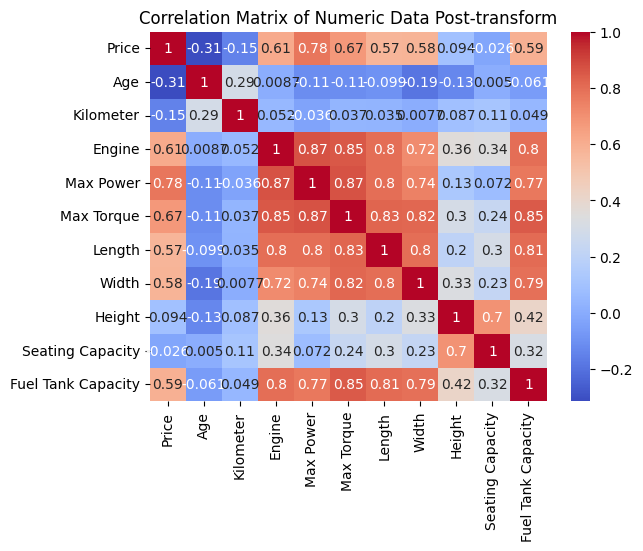

In [46]:
# Correlation among numeric variables Post-transform
corr = rmdf.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Data Post-transform")
plt.show()

In [47]:
# Describe categorical data Post-transform
print("Categorical Data Post-transform:")
rmdf.describe(include='object').T

Categorical Data Post-transform:


,count,unique,top,freq
Make,1861,32,Maruti Suzuki,394
Model,1861,946,X1 sDrive20d xLine,15
Fuel Type,1861,7,Diesel,950
Transmission,1861,2,Manual,1031
Location,1861,75,Mumbai,300
Color,1861,16,White,726
Owner,1861,4,First,1502
Seller Type,1861,3,Individual,1804
Drivetrain,1861,3,FWD,1313


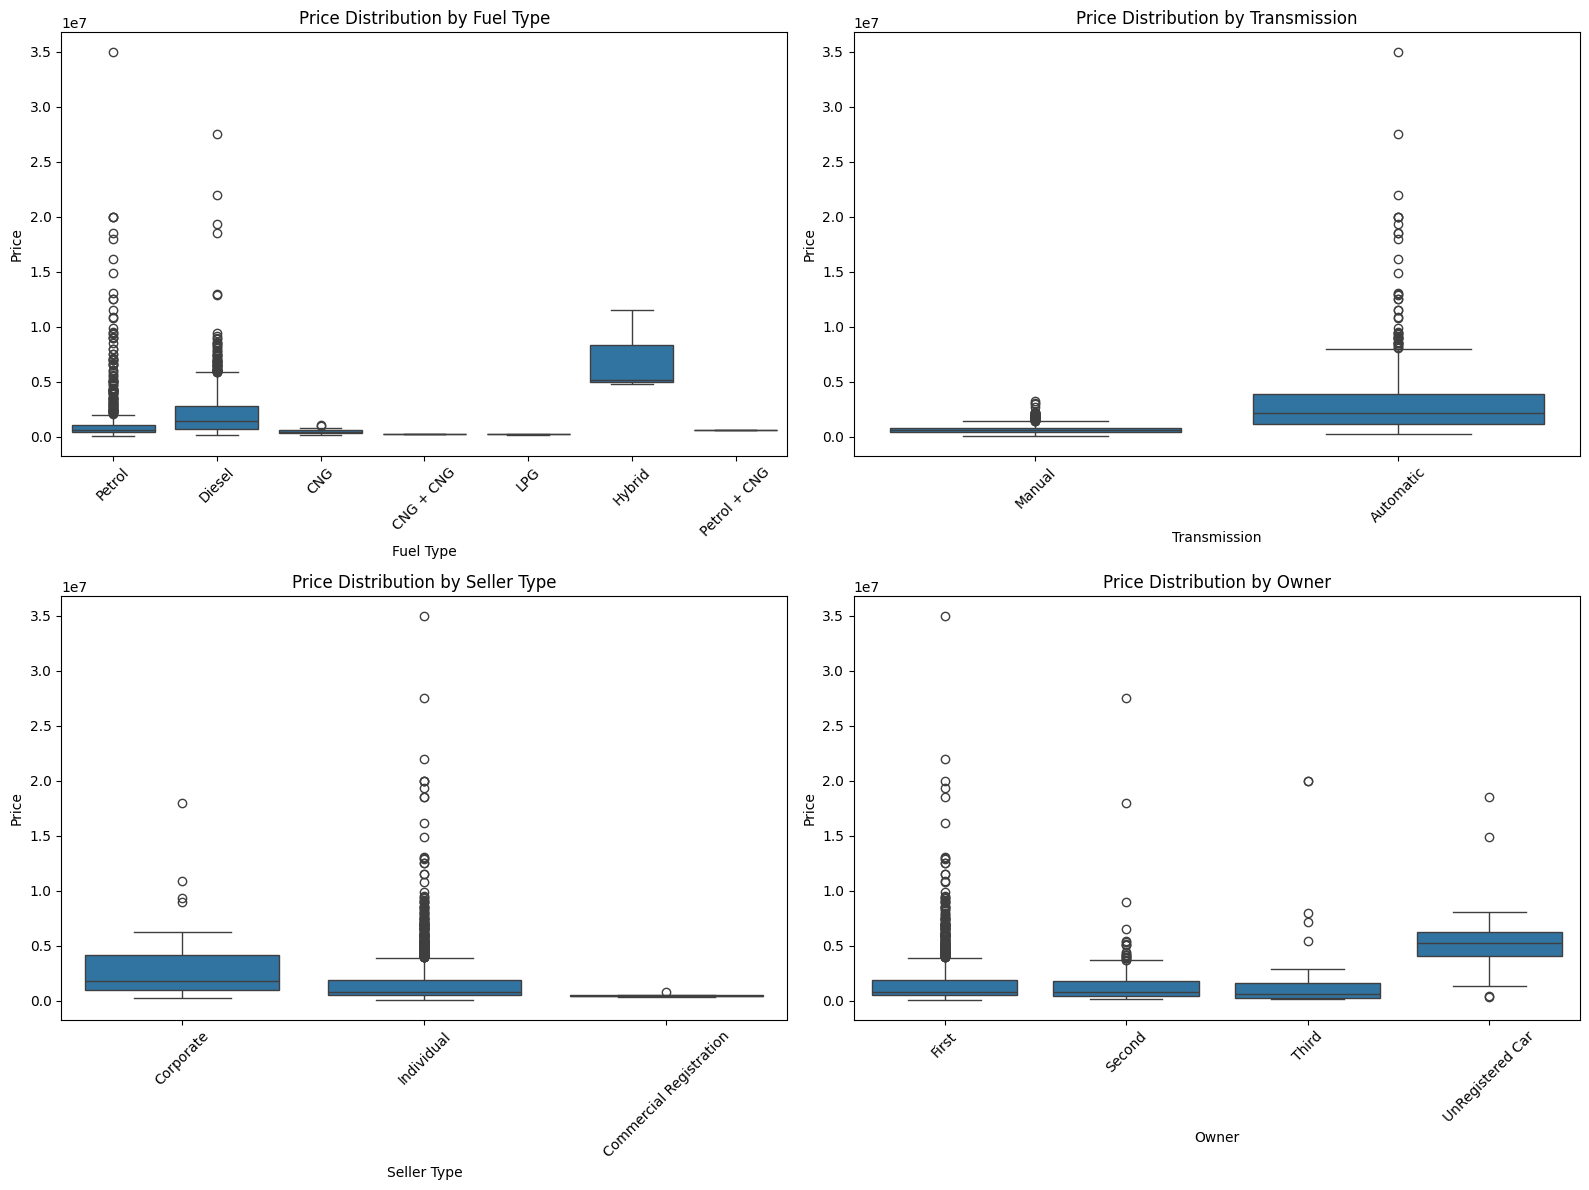

In [48]:
# Check correlation between Fuel type, Transmission, Seller Type, Owner and Price Post-transform
categorical_vars = ['Fuel Type', 'Transmission', 'Seller Type', 'Owner']
plt.figure(figsize=(16, 12))

for i, cat_var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=cat_var, y='Price', data=rmdf)
    plt.title(f'Price Distribution by {cat_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

###Drop feature 'Model'

In [49]:
rmdf = rmdf.drop('Model', axis=1)
rmdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 0 to 1873
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1861 non-null   object 
 1   Price               1861 non-null   int64  
 2   Age                 1861 non-null   int64  
 3   Kilometer           1861 non-null   int64  
 4   Fuel Type           1861 non-null   object 
 5   Transmission        1861 non-null   object 
 6   Location            1861 non-null   object 
 7   Color               1861 non-null   object 
 8   Owner               1861 non-null   object 
 9   Seller Type         1861 non-null   object 
 10  Engine              1861 non-null   float64
 11  Max Power           1861 non-null   float64
 12  Max Torque          1861 non-null   float64
 13  Drivetrain          1861 non-null   object 
 14  Length              1861 non-null   float64
 15  Width               1861 non-null   float64
 16  Height     

###Encode Categorical Features

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in rmdf.select_dtypes(include=['object']).columns:
    rmdf[column] = label_encoder.fit_transform(rmdf[column])

rmdf.head()

,Make,Price,Age,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,505000,8,87150,5,1,56,7,0,1,1198.0,876000.0,1.094500e+06,1,3990.0,1680.0,1505.0,5.0,35.0
1,18,450000,11,75000,2,1,40,14,1,2,1248.0,744000.0,1.902000e+06,1,3995.0,1695.0,1555.0,5.0,42.0
2,8,220000,14,67000,5,1,39,8,0,2,1197.0,796000.0,1.127619e+02,1,3585.0,1595.0,1550.0,5.0,35.0
3,29,799000,6,37500,5,1,41,12,0,2,1197.0,826000.0,1.134200e+06,1,3995.0,1745.0,1510.0,5.0,37.0
4,29,1950000,7,69000,2,1,45,7,0,2,2393.0,1483400.0,3.431400e+06,2,4735.0,1830.0,1795.0,7.0,55.0


##PHASE 3. MODEL TRAINING & EVALUATION

In [51]:
# Define features (X) and target (y)
X = rmdf.drop('Price', axis=1)  # Features (all columns except Seller Type)
y = rmdf['Price']  # Target (Seller Type column)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Splited successfully.')

Splited successfully.


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Linear Regression Model

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Linear Regression Model","\n Mean Absolute Error:", lr_mae,"\n Mean Squared Error:", lr_mse,"\n R-squared:", lr_r2)

Linear Regression Model 
 Mean Absolute Error: 790561.7932516464 
 Mean Squared Error: 1352625230284.299 
 R-squared: 0.7446137791978884


### Random Forest Model

In [54]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
rdfr_y_pred = model.predict(X_test)

# Evaluate
rdfr_mae = mean_absolute_error(y_test, rdfr_y_pred)
rdfr_mse = mean_squared_error(y_test, rdfr_y_pred)
rdfr_r2 = r2_score(y_test, rdfr_y_pred)

print("Random Forest Model","\n Mean Absolute Error:", rdfr_mae,"\n Mean Squared Error:", rdfr_mse,"\n R-squared:", rdfr_r2)

Random Forest Model 
 Mean Absolute Error: 293696.0243977591 
 Mean Squared Error: 455074330350.3734 
 R-squared: 0.9140784078175105


### XGBoost Model

In [55]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Model","\n Mean Absolute Error:", xgb_mae,"\n Mean Squared Error:", xgb_mse,"\n R-squared:", xgb_r2)

XGBoost Model 
 Mean Absolute Error: 266241.15625 
 Mean Squared Error: 495242870784.0 
 R-squared: 0.9064942598342896


##PHASE 4. MODELS COMPARISON & KEY TAKEAWAYS

In [56]:
# Create a dictionary with the model names and their metrics
model_comparison_data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [lr_mae, rdfr_mae, xgb_mae],
    'MSE': [lr_mse, rdfr_mse, xgb_mse],
    'R-squared': [lr_r2, rdfr_r2, xgb_r2]
}

# Create a pandas DataFrame from the dictionary
model_comparison_df = pd.DataFrame(model_comparison_data)

# Display the comparison table
print("Model Performance Comparison:")
display(model_comparison_df)

Model Performance Comparison:


,Model,MAE,MSE,R-squared
0,Linear Regression,790561.793252,1.352625e+12,0.744614
1,Random Forest,293696.024398,4.550743e+11,0.914078
2,XGBoost,266241.156250,4.952429e+11,0.906494


Insight:
- Based on the R-squared and MSE metrics, the Random Forest model appears to be the best performing model among the three. XGBoost is a close second, and Linear Regression performs the weakest, which is typical for datasets with complex relationships.